# **PROYEK ANALISIS DATA BIKE SHARING**
- **Nama    :** Ayna Dwi Rifdah Suwarliyandi
- **Email   :** aynadwirifdahsuwarliyandi@gmail.com
- **ID Dicoding   :** MS066D5X0571

## **MENENTUKAN PERTANYAAN BISNIS**

1. Bagaimana Pengaruh Musim terhadap Jumlah penyewaan?
2. Pada jam berapakah penyewaan sepeda mengalami peningkatan?

## **PACKAGE / LIBRARY YANG DIGUNAKAN**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## **DATA WRANGLING**

### GATHERING DATA

Pada bagian ini saya akan melakukan proses gathering data, yang mana saya akan mengumpulkan data - data yang dibutuhkan untuk dianalisis dan menghasilkan jawaban dari pertanyaan bisnisnya. Data yang saya kumpulkan ini

In [2]:
days_df = pd.read_csv("https://raw.githubusercontent.com/aynarifdah/dataset/refs/heads/main/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/aynarifdah/dataset/refs/heads/main/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### ASSESSING DATA


Pada bagian Assessing data ini, saya akan melakukan proses pengecekan masalah atau penilaian data agar data yang dihasilkan nantinya merupakan data yang berkualitas. pada proses ini saya akan melakukan pengecekan missing value, duplikasi , tipe data dan lainnya.

In [4]:
days_df.info()
print("\n")
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (t

ini merupakan proses pengecekan struktur data pada table `days_df` dan `hours_df` . Ditemukan kesalahan tipe data pada kolom `dteday` yang merupakan tipe data "object" namun seharusnya kolom `dteday` itu bertipe data " date time" . kesalahan ini akan saya perbaiki pada proses cleaning data nanti.

In [5]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


setelah saya melakukan pengecekan missing value, Dapat dilihat dari outputnya bahwa dalam table tidak ada missing value atau data kosong yang artinya semua data terisi dengan baik.

In [7]:
print("duplikasi sebanyak :", days_df.duplicated().sum())
print("duplikasi sebanyak :", hours_df.duplicated().sum())

duplikasi sebanyak : 0
duplikasi sebanyak : 0


ini merupakan kode pengecekan duplikasi dalam data. Dapat dilihat dari hasilnya bahwa tidak ada data yang duplikat (sama) dalam tabel `days` maupun tabel `hours`.

#### **Pengecekan Outlier**

##### Tabel `days`

In [8]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
column =["weathersit", "temp", "atemp", "hum", "windspeed"]

Q1 = days_df[column].quantile(0.25)
Q3 = days_df[column].quantile(0.75)
IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

outliers = (days_df[column] < min)| (days_df[column] > max)
print("Banyak Outlier pada kolom :\n", outliers.sum())

Banyak Outlier pada kolom :
 weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
dtype: int64


ini merupakan proses untuk menampilkan ringkasan statistik deskriptif agar bisa dianalisis terdapat masalah atau tidak seperti outlier dan lainnya. pada kode selanjutnya adalah proses pengecekan outlier pada tabel days dan ternyata terdapat sebanyak 15 outlier, 2 outlier pada kolom humidity dan 13 outlier pada kolom windspeed. Masalah ini akan saya atasi pada proses cleaning data nantinya.

#### Tabel `hours`

In [10]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
column =["weathersit", "temp", "atemp", "hum", "windspeed"]

Q1 = hours_df[column].quantile(0.25)
Q3 = hours_df[column].quantile(0.75)
IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

outliers = (hours_df[column] < min)| (hours_df[column] > max)
print("Banyak Outlier pada kolom :\n", outliers.sum())

Banyak Outlier pada kolom :
 weathersit      3
temp            0
atemp           0
hum            22
windspeed     342
dtype: int64


Pada proses pengecekan selanjutnya yaitu saya melakukan pengecekan outlier pada tabel `hours` yang mana terdapat sebanyak 364 outlier diantaranya yaitu 342 outlier pada kolom windspeed dan 22 outlier pada kolom humidity yang nantinya juga akan saya atasi pada saat proses cleaning data.

### CLEANING DATA

#### Pembersihan Outlier

In [12]:
days_outlier = days_df.copy()
for colm in column:
    days_outlier = days_outlier[(days_outlier[colm] >= min[colm]) & (days_outlier[colm] <= max[colm])]

In [13]:
outlier_counts = {}
for colm in column:
    outlier = days_outlier[(days_outlier[colm] < min[colm]) | (days_outlier[colm] > max[colm])]
    outlier_counts[colm] = len(outlier)

print("Jumlah outlier tabel `day` setelah pembersihan:")
print(outlier_counts)

Jumlah outlier tabel `day` setelah pembersihan:
{'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0}


pada proses ini saya melakukan pembersihan outlier pada tabel `day` dan setelah kode pembersihan dijalankan saya mengecek kembali outlier pada tabelnya untuk memastikan bahwa data sudah benar benar bersih.

In [14]:
hours_outlier = hours_df.copy()
for colm in column:
    hours_outlier = hours_outlier[(hours_outlier[colm] >= min[colm]) & (hours_outlier[colm] <= max[colm])]

In [15]:
outlier_counts = {}
for colm in column:
    outlier = hours_outlier[(hours_outlier[colm] < min[colm]) | (hours_outlier[colm] > max[colm])]
    outlier_counts[colm] = len(outlier)

print("Jumlah outlier tabel `hour` setelah pembersihan:")
print(outlier_counts)

Jumlah outlier tabel `hour` setelah pembersihan:
{'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0}


ini merupakan proses adalah proses pembersihan data pada tabel `hour` yang mana tadi sudah saya lakukan juga pada tabel `day`. Setelah saya bersihkan outlier, saya mengecek kembali outlier dalam tabel hour agar data yang dihasilkan adalah data yang bersih . Dapat dilihat dari outputnya, outlier sudah tidak ada.

#### Perbaikan Tipe Data

In [18]:
datetime_col = ["dteday"]

dataframe = [days_df, hours_df]
for df in dataframe :
  for column in datetime_col:
    df[column] = pd.to_datetime(df[column])

print(days_df.dtypes)
print("\n")
print(hours_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


ini merupakan tahap terakhir saya untuk proses cleaning data, yaitu memperbaiki tipe data pada tabel `day` dan `hour` dan untuk perbaikannya itu di kolom `dteday` . Pada awalnya kolom tersebut bertipe data object, yang kemudian saya perbaiki menjadi tipe data `datetime`.

In [32]:
merged_df = pd.merge(hours_outlier, days_outlier, on='dteday', how='inner')
merged_df.to_csv("datacleaned.csv", index=False)

kode ini gunanya untuk menggabungkan data yang sudah bersih

## **EXPLORATORY DATA ANALYSIS (EDA)**

### **EXPLORE**

okay, ditahap selanjutnya saya akan melakukan Exploratory data dengan tujuan agar mempermudah saya untuk menemukan jawaban dari pertanyaan - pertanyaan yang sudah saya buat .

In [25]:
#explorasi data untuk menemukan jawaban dari pertanyaan 1
season_aggregation = days_outlier.groupby(by='season').agg({
    'cnt': 'sum'
}).reset_index()

print("Jumlah Penyewaan Sepeda Berdasarkan Musim:")
print(season_aggregation)

#explorasi data untuk menemukan jawaban dari pertanyaan 2
hoursly = hours_outlier.groupby(by="hr").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

print("Jumlah Penyewaan Sepeda Berdasarkan Jam : ")
print(hoursly)

Jumlah Penyewaan Sepeda Berdasarkan Musim:
   season      cnt
0       1   469090
1       2   918589
2       3  1061129
3       4   841613
Jumlah Penyewaan Sepeda Berdasarkan Jam : 
       cnt
hr        
17  327757
18  302107
8   257375
19  224095
16  222294
13  180277
12  178331
15  177560
14  171511
20  161819
9   156299
7   154112
11  149349
10  124213
21  124028
22   94453
23   63687
6    54722
0    38984
1    24078
2    16247
5    14154
3     8119
4     4407


**Insight**
- berdasarkan jumlah penyewaan sepeda di setiap musim, peningkatan jumlah penyewa terjadi pada musim fall (musim gugur) sebanyak 1.061.129 penyewa dan penuruna terjadi pada musim winter (dingin).
- penywaan sepeda tertinggi yaitu pada jam 17.00 (5 sore) dan tercatat sebanyak 327.757 penyewa

## **VISUALIZATION & EXPLANATORY ANALYSIS**

**Pertanyaan 1**

<ipython-input-31-f3fa5efc8a5a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasons, palette='Blues')


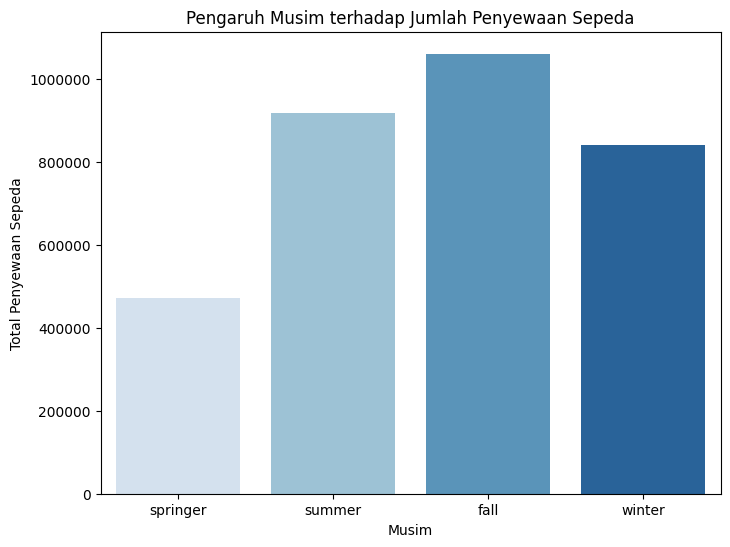

In [31]:
# bar chart untuk menampilkan hubungan antara musim dan jumlah penyewaan sepeda
seasons = df.groupby('season', as_index=False)['cnt'].sum()

seasons = df.groupby('season', as_index=False)['cnt'].sum()

# Mapping angka ke nama musim
season_map = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
seasons['season'] = seasons['season'].map(season_map)

#untuk tampilin plot
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasons, palette='Blues')

plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

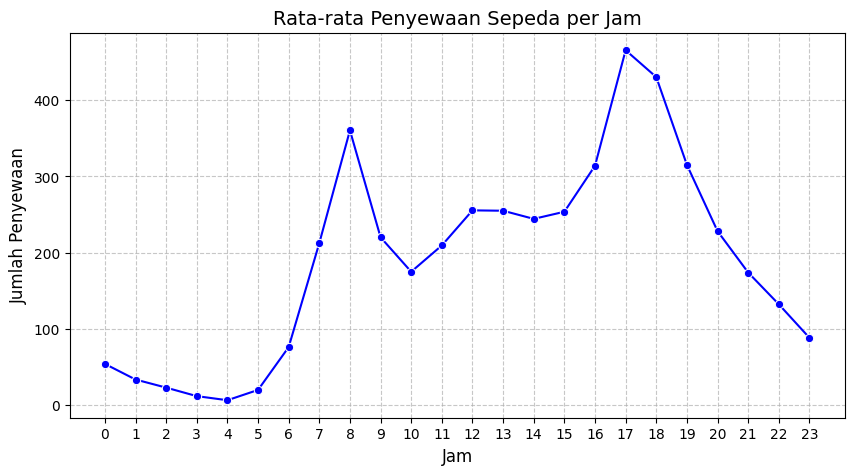

In [22]:
#rata -rata penyewaan sepeda per jam
hourly = hours_outlier.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly.index, y=hourly.values, marker="o", linestyle="-", color="b")

plt.title("Rata-rata Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(range(0, 24))

plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Insight**
- visualisasi pertama, menunjukkan bahwa jumlah penyewa meningkat pada saat musim gugur dan terjadi penurunan pada saat musim dingin. Itu artinya terjadi fluktuasi jumlah penyewa.

- pada visualisasi kedua menampilkan rata - rata penyewaan sepeda setiap jam. berdasarkan grafiknya menunjukan bahwa penyewaan meningkat pada jam 5 sore, sedangkan untuk penyewaan terendah pada jam 4 pagi.

## **CONCLUSION**

**Pertanyaan 1** :
Bagaimana Pengaruh Musim terhadap Jumlah penyewaan?
- pada musim gugur, penyewaan sepeda maningkat yang mencapai 1.061.129 penyewa yang kemudian mengalami penurunan pada musim panas dan mengalami penurunan juga pada musim dingin. Penyewaan terendah terdapat pada musim semi. Dapat disimpulkan bahwa musim berpengaruh besar terhadap jumlah penyewa sepeda.

**Pertanyaan 2** :
Pada jam berapakah penyewaan sepeda mengalami peningkatan?
- Peningkatan penyewaan terjadi pada jam - jam tertentu. berdasarkan hasil analisa menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada jam 5 sore yang mana pada jam tersebut merupakan jam pulang kantor sehingga menyebabkan peningkatan penyewa
